In [1]:
# Import from Standard Library
import logging
import os
import pathlib
import subprocess
import warnings
from glob import glob

# Import from Third Party Libraries
import earthpy.appeears as etapp
import folium
import geopandas as gpd
import hvplot.pandas
import hvplot.xarray
import pandas as pd
import rioxarray as rxr
import xarray as xr


# Set up logging so AppeearsDownloader will log in notebook
logging.basicConfig(level=logging.INFO)

# Ignore FutureWarning coming from hvplot
warnings.simplefilter(action='ignore', category=FutureWarning)

ModuleNotFoundError: No module named 'earthpy.appeears'

In [64]:
# RUN THIS CELL TO TEST YOUR CODE - DO NOT MODIFY!
import_pts = 0

# Check that folium has been imported
try:
    folium.Map()
    import_pts += 1
    print('\u2705 Great work! '
          'You correctly imported the folium library.')
except:
    print('\u274C Oops - folium was not imported.')
    
# Check that pandas has been imported properly
try:
    pd.DataFrame()
    import_pts += 1
    print('\u2705 Great work! '
          'You correctly imported the pandas library.')
except:
    print('\u274C Oops - pandas was not imported correctly.')
    
# Check that hvplot has been imported
try:
    pd.DataFrame().hvplot
    xr.Dataset().hvplot
    import_pts += 2
    print('\u2705 Great work! '
          'You correctly imported hvplot extensions')
except:
    print('\u274C Oops - hvplot was not imported correctly.')

# Subtract one point for any PEP-8 errors
tmp_path = "tmp.py"
with open(tmp_path, "w") as tmp_file:
    tmp_file.write(In[-2])
ignore_flake8 = 'W292,F401,E302'
flake8_out = subprocess.run(
    ['flake8', 
     '--ignore', ignore_flake8, 
     '--import-order-style', 'edited',
     '--count', 
     tmp_path],
    stdout=subprocess.PIPE,
).stdout.decode("ascii")
print(flake8_out)
import_pts -= int(flake8_out.splitlines()[-1])

print(
    "\n \u27A1 You received {} out of 4 points.".format(import_pts)
)

import_pts

✅ Great work! You correctly imported the folium library.
✅ Great work! You correctly imported the pandas library.
✅ Great work! You correctly imported hvplot extensions
0


 ➡ You received 4 out of 4 points.


4

We have one more setup task. We're not going to be able to load all our data directly from the web to Python this time. That means we need to set up a place for it on your computer (or in your Codespace).

> **GOTCHA ALERT**: A lot of times in Python we say "directory" to mean a "folder" on your computer. The two words mean more or less the same thing.

&#128187; YOUR TASK: In the cell below:
  1. Copy the following code into the cell:
        ```python
        my_path = os.path.join(
             pathlib.Path.home(), 'earth-analytics', 'data', 'camp-fire')
        os.makedirs(my_path, exist_ok=True)
        my_path
        ```
  2. Replace `my_path` with a descriptive variable name of your choice.
     > **PLEASE!** For ease of grading, do not change anything about the **content** stored as `my_path`. If you do, I will not be able to run your code without individually downloading for each of you, which could take a lot of time.
  4. Add descriptive comments about what this code is doing 

In [65]:
# Define File Path For Campfire Data
campfire_path = os.path.join(pathlib.Path.home(),
                             'earth-analytics', 'data', 'camp-fire')

# Create Directory Using Path
os.makedirs(campfire_path, exist_ok=True)

campfire_path

'/home/jovyan/earth-analytics/data/camp-fire'

In [66]:
# RUN THIS CELL TO TEST YOUR WORK - DO NOT MODIFY
ans_dir = _
print(ans_dir)
dir_pts = 0

if os.path.exists(ans_dir):
    print('\u2705 Great work! You created a project directory.')
    dir_pts += 5
else:
    print("\u274C Hmm, looks like you didn't create your project directory")

# Subtract one point for any PEP-8 errors
tmp_path = "tmp.py"
with open(tmp_path, "w") as tmp_file:
    tmp_file.write(In[-2])
ignore_flake8 = 'W292,F401,E302,F821'
flake8_out = subprocess.run(
    ['flake8',
     '--ignore', ignore_flake8,
     '--import-order-style', 'edited',
     '--count',
     tmp_path],
    stdout=subprocess.PIPE,
).stdout.decode("ascii")
print(flake8_out)
dir_pts -= int(flake8_out.splitlines()[-1])

print('\u27A1 You earned {} of 5 points for creating a data directory'
      .format(dir_pts))

dir_pts

/home/jovyan/earth-analytics/data/camp-fire
✅ Great work! You created a project directory.
0

➡ You earned 5 of 5 points for creating a data directory


5

## STEP 2: SITE

### Earth Data Science data formats

In Earth Data Science, we get data in three main formats:

|  Data type  |  Descriptions | Common file formats | Python type |
|-------------|---------------|---------------------|-------------|
| Time Series | The same data points (e.g. streamflow) collected multiple times over time | Tabular formats (e.g. .csv, or .xlsx) | pandas DataFrame |
| Vector | Points, lines, and areas (with coordinates) | Shapefile (often an archive like a `.zip` file because a Shapefile is actually a collection of at least 3 files) | geopandas GeoDataFrame |
| Raster | Evenly spaced spatial grid (with coordinates) | GeoTIFF (`.tif`), NetCDF (`.nc`), HDF (`.hdf`)| rioxarray DataArray |

&#128214; Read more about [vector data](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/) and [raster data](https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-raster-data/) in the textbook.

&#9998; For this coding challenge, we are interested the Camp Fire boundary as the study boundary. In the cell below, answer the following question: **What data type do you think the fire boundary will be?**


### Data Type
The Camp Fire boundary will most likely be a shapefile composed of lines or areas/polygons that defined the boundary of the fire.

&#128187; YOUR TASK:
  * Head to the [Wildland Fire Interagency Geospatial Services (WFIGS) Historic Perimeters 2018 API explorer site](https://data-nifc.opendata.arcgis.com/datasets/nifc::historic-perimeters-2018/api) from the National Interagency Fire Center.
  * Add filters until you get the single, final, perimeter. You may wish to try requesting the results in Python rather than on the API site since it will be easier to see how many records you get. One example that works:
    * incidentname like 'CAMP'
    * latest like 'Y'
  * Paste the link in the code cell below and **assign it to a descriptive Python name**
  * **Load the data into Python** using the `geopandas` library, e.g.:

  ```python
  gpd.read_file(url)
  ```
  
  * Call your `GeoDataFrame` name at the end of the cell for testing
  
  > `geopandas.GeoDataFrame` is an extension of `pandas.DataFrame` that contains spatial and geometric information and methods

In [67]:
campfire_bnd_gdf = gpd.read_file(
    "https://services3.arcgis.com/T4QMspbfLg3qTGWY/arcgis/rest/"
    "services/Historic_Geomac_Perimeters_2018/FeatureServer/0/query"
    "?where=incidentname%20%3D%20'CAMP'%20AND%20latest%20%3D%20'Y'"
    "&outFields=*&outSR=4326&f=json")

campfire_bnd_gdf

,OBJECTID,agency,comments,active,mapmethod,datecurrent,uniquefireidentifier,fireyear,incidentname,pooownerunit,...,incomplex,complexfirecode,mergeid,latest,modifiedon,createdon,temp,shape__Area,shape__Length,geometry
0,1398,CDF,Final,N,Mixed Methods,1543190400000,2018-CABTU-016737,2018,CAMP,CAPNF,...,N,,,Y,NaN,NaN,NaN,1.051101e+09,405925.626921,"MULTIPOLYGON (((-121.54448 39.88306, -121.5452..."


In [68]:
ans_gdf = _
gdf_pts = 0

if isinstance(ans_gdf, gpd.GeoDataFrame):
    print('\u2705 Great work! You downloaded and opened a GeoDataFrame')
    gdf_pts +=2
else:
    print('\u274C Hmm, your answer is not a GeoDataFrame')

if len(ans_gdf)==1:
    print('\u2705 Great work! You selected a single fire')
    gdf_pts +=2
else:
    print('\u274C Hmm, your GeoDataFrame does not have the right length')

if ans_gdf.incidentname.iloc[0]=='CAMP' and ans_gdf.latest.iloc[0]=='Y':
    print('\u2705 Great work! You selected the Camp fire perimeter')
    gdf_pts +=2
else:
    print('\u274C Hmm, that is not the latest Camp fire boundary')
    
print('\u27A1 You earned {} of 5 points for downloading a fire boundary'
      .format(gdf_pts))

✅ Great work! You downloaded and opened a GeoDataFrame
✅ Great work! You selected a single fire
✅ Great work! You selected the Camp fire perimeter
➡ You earned 6 of 5 points for downloading a fire boundary


### Site Map

The code below will help you to draw the Tribal subdivision boundaris on an interactive map.

&#128187; Your task:
  * Ask ChatGPT [how to plot a shapefile on a folium map](https://chat.openai.com/share/25988d5d-b355-4537-b2a1-71eafc60f67e)
  * Adapt the code to use the boundary data you downloaded
  * Add a labeled marker for Paradise, CA
  * Center the map at that same location with a reasonable `zoom_start` level

> **GOTCHA ALERT:** Make sure to call your map at the end of the cell so that it will display in your Notebook

&#127798; Customize your plot - can you add ESRI World Imagery as the basemap/background?


In [69]:
# Define Paradise, CA Location
paradise_lat=39.7596
paradise_lon=-121.6219

# Create Map
m = folium.Map(location=(paradise_lat-.01, paradise_lon+.05), 
               tiles=None,
               zoom_start=11)

# Convert data to JSON
campfire_bnd_json = campfire_bnd_gdf.to_json()

# Add fire boundary to map
folium.GeoJson(campfire_bnd_json).add_to(m)

# Add Paradise, CA Marker to map
folium.Marker(location=[paradise_lat, paradise_lon],
      popup="Paradise, CA",
      ).add_to(m)

# Add ESRI World Imagery (Source: https://gis.stackexchange.com/
# questions/290861/python-folium-package-for-satellite-map)
tile = folium.TileLayer(
        tiles = ('https://server.arcgisonline.com/ArcGIS/rest/services/'
        'World_Imagery/MapServer/tile/{z}/{y}/{x}'),
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(m)

m


## STEP 3: DATA

### Observing vegetation health from space
We will look at the destruction and recovery of vegetation in the area using the summertime (peak green) Normalized Difference Vegetation Index (NDVI). How does it work? First, we need to learn about spectral reflectance signatures.

Every object reflects some wavelengths of light more or less than others. We can see this with our eyes, since, for example, plants reflect a lot of green in the summer, and then as that green diminishes in the fall they look more yellow or orange. The image below shows spectral signatures for water, soil, and vegetation:

![](https://seos-project.eu/remotesensing/images/Reflexionskurven.jpg)
> Image source: [SEOS Project](https://seos-project.eu/remotesensing/remotesensing-c01-p06.html)

Healthy vegetation reflects a lot of Near-InfraRed (NIR) radiation. Less healthy vegetation reflects a similar amounts of the visible light spectra, but less NIR radiation. We don't see a huge drop in Green radiation until the plant is very stressed or dead. That means that NIR allows us to get ahead of what we can see with our eyes.

![](https://camo.githubusercontent.com/176b39433ef30866421bf28988812852b94a7705c75764deebde846560aebbc6/68747470733a2f2f666c75726f7361742e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031382f31302f67726f7774682d6d6f6e69746f72696e672d65313538333930323232383836372e706e6729)
> Image source: [Spectral signature literature review by px39n](https://github.com/px39n/Awesome-Vegetation-Index)

Different species of plants reflect different spectral signatures, but the *pattern* of the signatures are similar. NDVI compares the amount of NIR reflectance to the amount of Red reflectance, thus accounting for many of the species differences and isolating the health of the plant. The formula for calculating NDVI is:

$$NDVI = \frac{(NIR - Red)}{(NIR + Red)}$$

&#128214; Read more about NDVI and other vegetation indices:
  * [earthdatascience.org](https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/vegetation-indices-in-python/calculate-NDVI-python/)
  * [USGS](https://www.usgs.gov/landsat-missions/landsat-surface-reflectance-derived-spectral-indices)

You will download NDVI data collected from the MODIS platform for the study period. MODIS is a multispectral instrument that measures Red and NIR data (and so can be used for NDVI). There are two MODIS sensors on two different platforms: satellites Terra and Aqua.

&#128214; [Learn more about MODIS datasets and science](https://modis.gsfc.nasa.gov/)

&#9998; In the cell below, write a description of the data you will use. Make sure to include:
  * A citation
  * A brief explanation of the platform (Aqua satellite), sensor (MODIS), and post-processing (NDVI), including why these data will help you see vegetation recovery after a wildfire


WRITE YOUR DATA DESCRIPTION AND CITATION HERE

### Exploring the AppEEARS API for NASA Earthdata access

We're going to ask for a special download that only covers our study area, so we can't just find a link to the data - we have to negotiate with the data server. We're doing this using the [APPEEARS](https://appeears.earthdatacloud.nasa.gov/) API (Application Programming Interface). The API makes it possible for you to request data using code. Luckily, the `earthpy` library you imported can complete the entire negotiation, including picking up where you left of downloading should you have to restart your kernel.

> HINT: In order to download APPEEARS data, you will need and Earthdata account. `earthpy` will prompt you to store your username and password in your system keyring.

&#128187; YOUR TASK: 
1. In the cell below, paste the following code as a starting point:

    ```python
    # Initialize AppeearsDownloader for MODIS NDVI data
    ndvi_downloader = etapp.AppeearsDownloader(
        download_key='modis-ndvi',
        ea_dir=project_dir,
        product='',
        layer='',
        start_date='',
        end_date='',
        recurring=,
        year_range=,
        polygon=gdf
    )
    
    # Download files if the download directory does not exist
    if not os.path.exists(ndvi_downloader.data_dir):
        ndvi_downloader.download_files()
    
    ndvi_downloader
    ```
2. Modify `project_dir` to match **your** project directory name, and `gdf` to match the name of **your** `GeoDataFrame`.
3. Fill out the parameters so that you are downloading the highest **available** resolution **NDVI** layer of the **Aqua MODIS** platform from **Summer months (June, July, August) of 2017 to 2022**.

  > **HINT**: You will need to consult with the [list of APPEEARS datasets](https://appeears.earthdatacloud.nasa.gov/products).

  > **GOTCHA ALERT**: The product name will need to be formatted as `<product-name>.<version>`

4. Run the code. Note that orders from the APPEEARS API can take a few hours to be delivered. Check your status by logging in at [the Appeears status page](https://appeears.earthdatacloud.nasa.gov/explore)
   
   > **GOTCHA ALERT**: If your download fails, but your download directory has been created, this code will not initialize a new download. To start over fresh, delete the download directory in the Terminal OR change the `download_key`.
 

In [70]:
# Initialize AppeearsDownloader for MODIS NDVI data
ndvi_downloader = etapp.AppeearsDownloader(
    download_key="modis-ndvi",
    ea_dir=campfire_path,
    product="MYD13Q1.061",
    layer="_250m_16_days_NDVI",
    start_date="06-01",
    end_date="08-31",
    recurring=True,
    year_range=[2017, 2022],
    polygon=campfire_bnd_gdf,
)

# Download files if the download directory does not exist
if not os.path.exists(ndvi_downloader.data_dir):
    ndvi_downloader.download_files()

ndvi_downloader

In [71]:
# RUN THIS CELL TO TEST YOUR WORK - DO NOT MODIFY!
ans_download = _
download_pts = 0

if os.path.exists(ndvi_downloader.data_dir):
    print('\u2705 Great work! You started your download')
    download_pts += 1
else:
    print('\u274C Hmm, looks like your data did not download')

if len(glob(os.path.join(ndvi_downloader.data_dir, '*', '*')))==82:
    print('\u2705 Great work! Your download succeeded')
    download_pts += 4
else:
    print('\u274C Hmm, looks like your data did not download')

# Subtract one point for any PEP-8 errors
tmp_path = "tmp.py"
with open(tmp_path, "w") as tmp_file:
    tmp_file.write(In[-2])
ignore_flake8 = 'W292,F401,E302,F821'
flake8_out = subprocess.run(
    ['flake8', 
     '--ignore', ignore_flake8, 
     '--import-order-style', 'edited',
     '--count', 
     tmp_path],
    stdout=subprocess.PIPE,
).stdout.decode("ascii")
print(flake8_out)
download_pts -= int(flake8_out.splitlines()[-1])

print('\u27A1 You earned {} of 5 points for downloading data'
      .format(download_pts))

download_pts

✅ Great work! You started your download
✅ Great work! Your download succeeded
0

➡ You earned 5 of 5 points for downloading data


5

## Putting it together: Working with multi-file raster datasets in Python

Now you need to load all the downloaded files into Python. Let's start by getting all the file names. You will also need to extract the date from the filename. Check out [the lesson on getting information from filenames in the textbook](https://www.earthdatascience.org/courses/intro-to-earth-data-science/write-efficient-python-code/loops/data-workflows-with-loops/).

> **GOTCHA ALERT:** `glob` doesn't necessarily find files in the order you would expect. Make sure to **sort** your file names like it says in the textbook.

In [72]:

# Print all dirs found by glob
data_dirs = os.path.join(campfire_path, "*")
all_dirs = glob(data_dirs)
# Nesting for loops
campfire_files = []
for a_dir in all_dirs:
    dir_path = os.path.join(a_dir, "*")
    all_file_paths = (glob(dir_path))
    # Create a nested loop which loops through each directory
    for a_file_path in all_file_paths:
       campfire_files.append(a_file_path)
campfire_files_sort = sorted(campfire_files)
campfire_files_sort

glob(ndvi_downloader.data_dir)

['/home/jovyan/earth-analytics/data/camp-fire/modis-ndvi']

In [73]:
# Create List of NDVI tif files
ndvi_path_lst = glob(os.path.join(ndvi_downloader.data_dir, "*", "*NDVI*.tif"))

ndvi_path_lst

['/home/jovyan/earth-analytics/data/camp-fire/modis-ndvi/MYD13Q1.061_2017137_to_2022243/MYD13Q1.061__250m_16_days_NDVI_doy2019137_aid0001.tif',
 '/home/jovyan/earth-analytics/data/camp-fire/modis-ndvi/MYD13Q1.061_2017137_to_2022243/MYD13Q1.061__250m_16_days_NDVI_doy2018185_aid0001.tif',
 '/home/jovyan/earth-analytics/data/camp-fire/modis-ndvi/MYD13Q1.061_2017137_to_2022243/MYD13Q1.061__250m_16_days_NDVI_doy2017169_aid0001.tif',
 '/home/jovyan/earth-analytics/data/camp-fire/modis-ndvi/MYD13Q1.061_2017137_to_2022243/MYD13Q1.061__250m_16_days_NDVI_doy2020185_aid0001.tif',
 '/home/jovyan/earth-analytics/data/camp-fire/modis-ndvi/MYD13Q1.061_2017137_to_2022243/MYD13Q1.061__250m_16_days_NDVI_doy2020233_aid0001.tif',
 '/home/jovyan/earth-analytics/data/camp-fire/modis-ndvi/MYD13Q1.061_2017137_to_2022243/MYD13Q1.061__250m_16_days_NDVI_doy2021185_aid0001.tif',
 '/home/jovyan/earth-analytics/data/camp-fire/modis-ndvi/MYD13Q1.061_2017137_to_2022243/MYD13Q1.061__250m_16_days_NDVI_doy2022169_aid000

In [74]:
# RUN THIS CELL TO TEST YOUR CODE - DO NOT MODIFY!
ans_glob = _
glob_pts = 0

if len(ans_glob)==41:
    print('\u2705 Great work! Your correctly filtered your files')
    glob_pts += 5
else:
    print('\u274C Hmm, looks like you did not find the correct files')

# Subtract one point for any PEP-8 errors
tmp_path = "tmp.py"
with open(tmp_path, "w") as tmp_file:
    tmp_file.write(In[-2])
ignore_flake8 = 'W292,F401,E302,F821'
flake8_out = subprocess.run(
    ['flake8', 
     '--ignore', ignore_flake8, 
     '--import-order-style', 'edited',
     '--count', 
     tmp_path],
    stdout=subprocess.PIPE,
).stdout.decode("ascii")
print(flake8_out)
glob_pts -= int(flake8_out.splitlines()[-1])

print('\u27A1 You earned {} of 5 points for getting file names'
      .format(glob_pts))

glob_pts

✅ Great work! Your correctly filtered your files
0

➡ You earned 5 of 5 points for getting file names


5

## STEP 4 - IMPORT DATA

### Repeating tasks in Python

Now you should have dozens of files! For each file, you need to:
  * Load the file in using the `rioxarray` library
  * Get the date from the file name
  * Add the date as a dimension coordinate
  * Give your data variable a name
  * Divide by the scale factor of 10000

You don't want to write out the code for each file -- That's a recipe for copy pasta. Luckily, Python has tools for doing similar tasks repeatedly. In this case, you'll use one called a `for` loop.

Check out the [textbook page on `for` loops](https://www.earthdatascience.org/courses/intro-to-earth-data-science/write-efficient-python-code/loops/automate-data-tasks-with-loops/)

There's some code below that uses a `for` loop in what is called an **accumulation pattern** to process each file. That means that you will save the results of your processing to a list each time you process the files, and then merge all the arrays in the list. 

```python
ndvi_das = []
for ndvi_path in ndvi_paths:
    # Get date from file name
    doy = ndvi_path[doy_start:doy_end]
    date = pd.to_datetime(doy, format='')

    # Open dataset
    da = rxr.open_rasterio(ndvi_path, masked=True).squeeze()

    # Prepare to concatenate: Add date dimension and clean up metadata
    da = da.assign_coords({'date': date})
    da = da.expand_dims({'date': 1})
    da.name = 'NDVI'

    # Divide by scale factor

    # Add the DataArray to the end of the accumulator list

ndvi_das
```

Your task is to:
  1. Replace any names with your chosen variable names
  2. Look at the file names. How many characters from the end is the beginning of the date? The end of the date? Define the missing names `doy_start`, `doy_end`.
  3. Assign the name `scale_factor` the correct value for this NDVI dataset (HINT: NDVI should range between 0 and 1)
  4. Put the correct **format string** for this application in the `pd.to_datetime` function
  5. Add the code needed to divide by the scale factor and stick the now-loaded DataArray at the end of your list of DataArrays (accumulate).
  
&#127798; You can also get the date with a tool called a regular expression (`re` library). See if you can get the code working that way too! You may find it helpful to test your regular expression at this [regex tester site](https://regex101.com/).

> HINT: **DO NOT** try to complete all these steps without running your code! Use these debugging tips:
>   * Comment out code you haven't gotten to yet
>   * Complete one step at a time
>   * Test your work by looking at the results before moving on to the next step
>   * Use the `break` keyword at the end of your `for` loop (or a breakpoint) to run the code on only the first `DataArray`

In [75]:
doy_start = -19
doy_end = -12
scale_factor = 10000
ndvi_da_list = []
for ndvi_path in ndvi_path_lst:
    # Get date from file name
    doy = ndvi_path[doy_start:doy_end]
    date = pd.to_datetime(doy, format='%Y%j')
    # Open dataset
    da = rxr.open_rasterio(ndvi_path, masked=True).squeeze()

    # Prepare to concatenate: Add date dimension and clean up metadata
    da = da.assign_coords({'date': date})
    da = da.expand_dims({'date': 1})
    da.name = 'NDVI'

    # Divide by scale factor
    da = da / scale_factor
    # Add the DataArray to the end of the accumulator list
    ndvi_da_list.append(da)
ndvi_da_list

[<xarray.DataArray 'NDVI' (date: 1, y: 144, x: 205)>
 array([[[0.5017, 0.6231, 0.6237, ..., 0.7794, 0.8023, 0.8023],
         [0.5582, 0.5582, 0.6397, ..., 0.7343, 0.7343, 0.7642],
         [0.5804, 0.5733, 0.718 , ..., 0.8314, 0.7765, 0.7974],
         ...,
         [0.5749, 0.5678, 0.6132, ..., 0.7506, 0.7981, 0.7981],
         [0.6034, 0.6181, 0.6132, ..., 0.7981, 0.7981, 0.7981],
         [0.6156, 0.6156, 0.5998, ..., 0.7906, 0.8064, 0.8064]]],
       dtype=float32)
 Coordinates:
     band         int64 1
   * x            (x) float64 -121.8 -121.8 -121.8 ... -121.4 -121.4 -121.4
   * y            (y) float64 39.9 39.89 39.89 39.89 ... 39.61 39.6 39.6 39.6
     spatial_ref  int64 0
   * date         (date) datetime64[ns] 2019-05-17,
 <xarray.DataArray 'NDVI' (date: 1, y: 144, x: 205)>
 array([[[0.4765, 0.5597, 0.5503, ..., 0.6885, 0.7655, 0.7655],
         [0.4696, 0.4696, 0.5508, ..., 0.76  , 0.76  , 0.7703],
         [0.4446, 0.4602, 0.5992, ..., 0.7718, 0.7842, 0.7842],
        

In [76]:
# RUN THIS CELL TO TEST YOUR WORK - DO NOT MODIFY!
ans_open = _
open_pts = 0

# Check that the called value is a list of DataArrays
if all([isinstance(da, xr.DataArray) for da in ans_open]):
    print('\u2705 Great work! You loaded your data into DataArrays')
    open_pts += 2
else:
    print('\u274C Hmm, looks like you have not loaded your data yet')

# Check that there are the right number of DataArrays
if len(ans_open)==41:
    print('\u2705 Great work! Your loaded all the DataArrays')
    open_pts += 2
else:
    print('\u274C Hmm, looks like you have too few or too many DataArrays')

# Check that there is a datetime coordinate
has_dt_coord_list = []
for da in ans_open:
    has_dt_coord = False
    for name, coord in da.coords.items():
        try:
            coord.dt
            has_dt_coord = True
        except TypeError:
            pass
    has_dt_coord_list.append(has_dt_coord)
if all(has_dt_coord_list):
    print('\u2705 Great work! You added a Datetime Coordinate')
    open_pts += 4
else:
    print('\u274C Hmm, looks like you did not add a date coordinate '
          'or you did not correctly convert your dates')

# Check that the scale factor was applied
if (all([(da.max() <= 1) for da in ans_open]) 
        and all([(da.min() >= -1) for da in ans_open])):
    print('\u2705 Great work! You correctly scaled your data')
    open_pts += 2
else:
    print('\u274C Hmm, looks like you did not scale your data')

# Subtract one point for any PEP-8 errors
tmp_path = "tmp.py"
with open(tmp_path, "w") as tmp_file:
    tmp_file.write(In[-2])
ignore_flake8 = 'W292,F401,E302,F821'
flake8_out = subprocess.run(
    ['flake8', 
     '--ignore', ignore_flake8, 
     '--import-order-style', 'edited',
     '--count', 
     tmp_path],
    stdout=subprocess.PIPE,
).stdout.decode("ascii")
print(flake8_out)
open_pts -= int(flake8_out.splitlines()[-1])

print('\u27A1 You earned {} of 10 points for downloading data'
      .format(open_pts))

open_pts

✅ Great work! You loaded your data into DataArrays
✅ Great work! Your loaded all the DataArrays
✅ Great work! You added a Datetime Coordinate
✅ Great work! You correctly scaled your data
0

➡ You earned 10 of 10 points for downloading data


10

Next, stack your arrays by date into a time series using the `xr.combine_by_coords()` function. You will have to tell it which **dimension** you want to stack your data in, using the `coords=['dimension_name']` parameter.

> HINT: which dimension do you want to get longer?

> GOTCHA ALERT: The `coords` parameter must be a list, even if there is only one. 

In [77]:
ndvi_ds = xr.combine_by_coords(ndvi_da_list, coords=['date'])

ndvi_ds

<xarray.Dataset>
Dimensions:      (x: 205, y: 144, date: 41)
Coordinates:
    band         int64 1
  * x            (x) float64 -121.8 -121.8 -121.8 ... -121.4 -121.4 -121.4
  * y            (y) float64 39.9 39.89 39.89 39.89 ... 39.61 39.6 39.6 39.6
    spatial_ref  int64 0
  * date         (date) datetime64[ns] 2017-05-17 2017-06-02 ... 2022-08-21
Data variables:
    NDVI         (date, y, x) float32 0.5136 0.6001 0.5736 ... 0.4264 0.4514

In [78]:
# RUN THIS CELL TO TEST YOUR WORK - DO NOT MODIFY!
ans_combine = _
combine_pts = 0

# Check that the called value is a Dataset
if isinstance(ans_combine, xr.Dataset):
    print('\u2705 Great work! You combined your data into a Dataset')
    combine_pts += 1
else:
    print('\u274C Hmm, did you call your combined Dataset?')

# Check that there are the right number of DataArrays
if ans_combine.dims=={'x': 205, 'y': 144, 'date': 41}:
    print('\u2705 Great work! Your loaded all the DataArrays')
    combine_pts += 2
else:
    print('\u274C Hmm, looks like you have too few or too many '
          'DataArrays')

# Subtract one point for any PEP-8 errors
tmp_path = "tmp.py"
with open(tmp_path, "w") as tmp_file:
    tmp_file.write(In[-2])
ignore_flake8 = 'W292,F401,E302,F821'
flake8_out = subprocess.run(
    ['flake8', 
     '--ignore', ignore_flake8, 
     '--import-order-style', 'edited',
     '--count', 
     tmp_path],
    stdout=subprocess.PIPE,
).stdout.decode("ascii")
print(flake8_out)
combine_pts -= int(flake8_out.splitlines()[-1])

print('\u27A1 You earned {} of 3 points for downloading data'
      .format(combine_pts))

combine_pts

✅ Great work! You combined your data into a Dataset
✅ Great work! Your loaded all the DataArrays
0

➡ You earned 3 of 3 points for downloading data


3

### Plot the change in NDVI spatially

&#128187; **YOUR TASK:** Complete the following (ask ChatGPT or look in the xarray documentation if you aren't sure how to complete the first 4 steps):
  1. Select data from 2019 using the `.sel()` method
  2. Take the temporal mean (over the **date**, not spatially) using the `.mean()` method
  3. Repeat for the data from 2017
  4. Subtract the pre-fire year from the post-fire years
  5. Plot the result

> **HINT**: You can use the `hvplot()` method with an `xarray.Dataset` too! When plotting maps, there are many considerations related to the type of geographic coordinates you are using. `hvplot` can take care of a lot of that for you, provided that the `geoviews` package is installed (which it should be for you). However, to use the plotting methods that avoid a warped image you **must** include the parameter `geo=True`, as well as specifying `x='x'` and `y='y'`.
    
  6. Use a **diverging** color map, e.g. by chaining `.opts(cmap='PiYG')` onto the end of your spatial plotting code.

> There are different types of color maps for different types of data. In this case, we want decreases to be a different color from increases, so we use a **diverging** color map. Check out available colormaps in the [matplotlib documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

&#127798; For an extra challenge, add the Camp Fire Boundary to the plot


<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

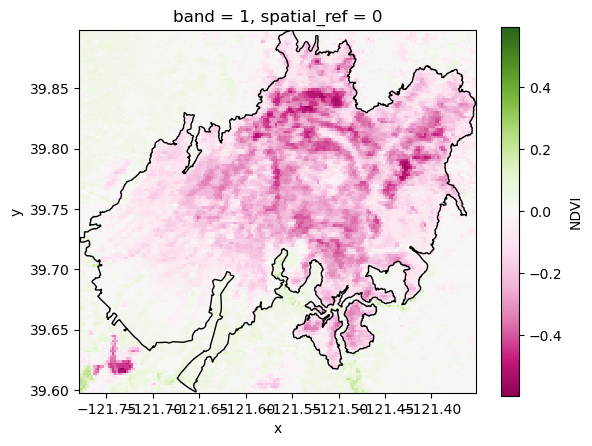

In [79]:
# Import pyplot from matplotlib
import matplotlib.pyplot as plt

# Get mean NDVI data for 2019
ndvi_2019_da = (ndvi_ds
    .sel(date='2019')
    .mean('date')
    .NDVI
)

# Get mean NDVI data for 2017
ndvi_2017_da = (ndvi_ds
    .sel(date='2017')
    .mean('date')
    .NDVI
)

# Get difference between 2019 and 2017
ndvi_diff_da = ndvi_2019_da - ndvi_2017_da

# Plot difference in NDVI data
ndvi_diff_da.plot(cmap=plt.colormaps['PiYG'])

# Add Campfire boundary
campfire_bnd_gdf.plot(ax=plt.gca(), facecolor='none')

# Did the NDVI drop more inside the fire boundary than nearby?

You will compute the mean NDVI inside and outside the fire boundary. I have tried asking ChatGPT how to accomplish this [in this chat](https://chat.openai.com/share/ea0a406d-7344-4bd4-ba66-f25e82e6a9fb). I got a useful response, but I wasn't able to get a workflow from ChatGPT that did not require the **envelope** of the fire boundary as a separate file.

> NOTE: An **envelope** of a shape is the smallest rectangle that contains the entire shape.

&#128187; **YOUR TASK:**
  1. First, use the code below to get the envelope of the fire boundary as a `GeoDataFrame`:

    ```python
    gpd.GeoDataFrame(geometry=gdf.envelope)
    ```
    
  2. Use the code from ChatGPT as a starting point, or writing your own, get the geometric difference between the envelope and the fire boundary as a `GeoDataFrame`

  3. Test if the geometry was modified correctly -- Add some code to help you take a look at the results.

> HINT: You can use the `hvplot()` method to plot `GeoDataFrame`s too, so you can check that the code works.

In [80]:
# Get area outside of Campfire
out_gdf = (
    gpd.GeoDataFrame(geometry=campfire_bnd_gdf.envelope)
    .overlay(right=campfire_bnd_gdf, how="difference")
)

out_gdf

,geometry
0,"MULTIPOLYGON (((-121.77783 39.59859, -121.7778..."


In [81]:
# RUN THIS CELL TO TEST YOUR CODE - DO NOT MODIFY!
ans_out = _
out_pts = 0

if int(round(out_gdf.to_crs(26910).area, -4))==589960000:
    print('\u2705 Great work! Your correctly took a spatial difference')
    out_pts += 5
else:
    print('\u274C Hmm, looks like your spatial difference is incorrect')

# Subtract one point for any PEP-8 errors
tmp_path = "tmp.py"
with open(tmp_path, "w") as tmp_file:
    tmp_file.write(In[-2])
ignore_flake8 = 'W292,F401,E302,F821'
flake8_out = subprocess.run(
    ['flake8',
     '--ignore', ignore_flake8,
     '--import-order-style', 'edited',
     '--count',
     tmp_path],
    stdout=subprocess.PIPE,
).stdout.decode("ascii")
print(flake8_out)
out_pts -= int(flake8_out.splitlines()[-1])

print('\u27A1 You earned {} of 5 points for getting file names'
      .format(out_pts))

out_pts

✅ Great work! Your correctly took a spatial difference
0

➡ You earned 5 of 5 points for getting file names


5


&#128187; **YOUR TASK:** Clip your DataArray to the boundaries for both inside and outside the reservation. You will need to replace the `GeoDataFrame` name with your own. Check out the [lesson on clipping data with the `rioxarray` library in the textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/crop-raster-data-with-shapefile-in-python/).

> **GOTCHA ALERT:** It's important to use `from_disk=True` when clipping large arrays like this. It allows the computer to use less valuable memory resources when clipping - you will probably find that otherwise the cell below crashes the kernel

In [82]:
# Clip Campfire data to boundary
ndvi_fire_ds = ndvi_ds.rio.clip(campfire_bnd_gdf.geometry)

# Clip area outside of Campfire
ndvi_out_ds = ndvi_ds.rio.clip(out_gdf.geometry)

&#128187; **YOUR TASK:** Practice chaining `xarray` methods! For **both inside and outside** the Camp fire boundary:
  1. Group the data by year using
  2. Take the mean. You always need to tell reducing methods in `xarray` what dimensions you want to reduce. When you want to summarize data across **all** dimensions (except the group dimension(s)), you can use the `...` syntax, e.g. `.mean(...)` as a shorthand.
  3. Select the NDVI variable
  4. Convert to a `DataFrame` using the `to_dataframe()` method
  5. Call **both** of your `DataFrame`s at the end of the cell for testing, e.g.
     ```python
     inside_df, outside_df
     ```

> **GOTCHA ALERT:** the DateIndex in pandas is a little different from the Datetime Dimension in xarray. You will need to use the `.dt.year` syntax to access information about the year, not just `.year`.

In [83]:
# Define function to get dataframe of mean NDVI by year
def df_annual_ndvi(indata):
    return (
        indata.groupby(indata.date.dt.year)
        .mean(...)
        .NDVI.to_dataframe()[["NDVI"]]
    )


# Create dataframe of NDVI for Campfire area
ndvi_fire_df = df_annual_ndvi(ndvi_fire_ds)

# Create dataframe of NDVI for the area outside Campire
ndvi_out_df = df_annual_ndvi(ndvi_out_ds)

# Check value
print(round((ndvi_fire_df - ndvi_out_df).sum(), 2).sum())

# Return dataframes
ndvi_fire_df, ndvi_out_df

-0.29


(          NDVI
 year          
 2017  0.623880
 2018  0.626274
 2019  0.462839
 2020  0.503273
 2021  0.487732
 2022  0.524007,
           NDVI
 year          
 2017  0.616702
 2018  0.615244
 2019  0.625270
 2020  0.616613
 2021  0.494234
 2022  0.548292)

In [84]:
# RUN THIS CELL TO TEST YOUR CODE - DO NOT MODIFY!
print(_)
(ans_in, ans_out) = _
out_pts = 0

if round((ans_in - ans_out).sum(), 2).sum()==-0.29:
    print('\u2705 Great work! Your correctly clipped your data')
    out_pts += 5
else:
    print('\u274C Hmm, looks like your clipping is incorrect')

# Subtract one point for any PEP-8 errors
tmp_path = "tmp.py"
with open(tmp_path, "w") as tmp_file:
    tmp_file.write(In[-2])
ignore_flake8 = 'W292,F401,E302,F821'
flake8_out = subprocess.run(
    ['flake8',
     '--ignore', ignore_flake8,
     '--import-order-style', 'edited',
     '--count',
     tmp_path],
    stdout=subprocess.PIPE,
).stdout.decode("ascii")
print(flake8_out)
out_pts -= int(flake8_out.splitlines()[-1])

print('\u27A1 You earned {} of 5 points for clipping'
      .format(out_pts))

out_pts

(          NDVI
year          
2017  0.623880
2018  0.626274
2019  0.462839
2020  0.503273
2021  0.487732
2022  0.524007,           NDVI
year          
2017  0.616702
2018  0.615244
2019  0.625270
2020  0.616613
2021  0.494234
2022  0.548292)
❌ Hmm, looks like your clipping is incorrect
0

➡ You earned 0 of 5 points for clipping


0

&#128187; YOUR TASK:
  1. Take the difference between outside and inside the Reservation
     > GOTCHA ALERT: You may need to select the NDVI columns of your inside/outside `DataFrame`s in order to subtract effectively
  2. Save it as a new column in your `DataFrame`
  3. Plot the difference. What do you observe? Don't forget to write a **headline and description** of your plot!

&#127798; For an extra challenge, add a vertical line showing when the fire occurred. Note that unfortunately you will need to convert the date to a decimal of a year. You may find the pandas datetime method `.toordinal()` useful.


<Axes: title={'center': 'Difference between Summer NDVI inside Camp Fire area and outside'}, xlabel='Year', ylabel='Summer NDVI'>

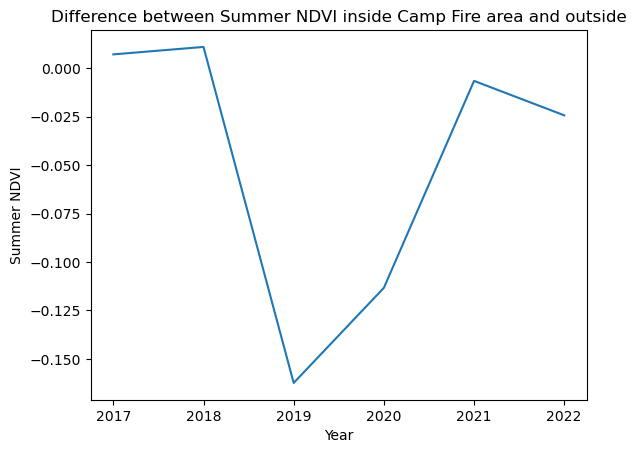

In [85]:
# Calculate Difference between Dataframes & Save to Dataframe
ndvi_fire_df['Difference'] = (ndvi_fire_df - ndvi_out_df)

# Plot Difference
ndvi_fire_df.Difference.plot(
    title="Difference between Summer NDVI inside Camp Fire area and outside",
    xlabel="Year",
    ylabel="Summer NDVI")

# # Trying to add vertical line
# import datetime

# camp_date= datetime.datetime(2018, 11, 8)

# # Start of Year in Ordinal Format
# start_date = datetime.datetime(2018, 1, 1).toordinal()

# # Length of Year
# year_len = datetime.date(2019, 1, 1).toordinal() - start_date

# # Camp Fire Date in Ordinal Format
# camp_date_ord = camp_date.year + (camp_date.toordinal() - start_date) / year_len
# camp_date_ord

# # Plot with vertical line
# plt.plot(ndvi_fire_df.reset_index()["year"], ndvi_fire_df["Difference"])
# plt.axvline(x=camp_date_ord, color='red', ls='--')
# plt.show()

### NDVI has largely rebounded within two years of the fire.

Average summer NDVI dropped after the Camp Fire in late 2018. However, NDVI does not allow us to determine the types of vegetation present. It is likely that the vegetation present in 2021 does not reflect the vegetation present before the fire; restoration of forests will likely take more time.

## Your turn! Repeat this workflow in a different time and place for your portfolio.

It's not just water rights that affect NDVI! You could look at: 
  * Recovery after a national disaster, like a wildfire or hurricane
  * The effects of drought on crop health
  * Deforestation

You can even choose a different dataset, like Landsat, and/or a different spectral index. [Check out some other ways to enhance images and highlight different phenomena](https://www.usgs.gov/landsat-missions/landsat-surface-reflectance-derived-spectral-indices)